## Soru 5

#### 5.1

* Iki hidden layer’lı bir Multilayer Perceptron (MLP) oluşturun be ̧sinci ve altıncı haftalarda yaptı ̆gımız gibi. Hazır aktivasyon fonksiyonlarını kullanmak serbest.  ̇Ilk hidden layer’da 100, ikinci hidden layer’da 50 n oron olsun. Hidden layer’larda ReLU, output layer’da sigmoid aktivasyonu olsun.

* Output layer’da ka ̧c n ̈oron olaca ̆gını veri setinden bakıp bulacaksınız. Elbette bu veriye uygun Cross Entropy loss y ̈ontemini uygulayacaksınız. Optimizasyon i ̧cin Stochastic Gradient Descent yeterli. Epoch sayınızı ve learning rate’i validasyon seti üzerinde denemeler yaparak (loss’lara overfit var mı diye bakarak) kendiniz belirleyeceksiniz. Batch size’ı 16 seçebilirsiniz.

#### 5.2

* SEED=öğrenci numaranız set ettikten sonra altıncı haftada yazdığımız gibi training batch'lerinden eğitim loss'ları, validation batch'lerinden validasyon loss değerlerini hesaplayan kodu aşağıdaki kod bloğuna yapıştırın ve çıkan figürü de alta ekleyin.

#### 5.3

* SEED=öğrenci numaranız set ettikten sonra altıncı haftada ödev olarak verdiğim gibi earlystopping'deki en iyi modeli kullanarak, Prensesi İyileştir test setinden accuracy, F1, precision ve recall değerlerini hesaplayan kodu yazın ve sonucu da aşağı yapıştırın. \%80'den fazla başarı bekliyorum test setinden. Daha düşükse başarı oranınız, nerede hata yaptığınızı bulmaya çalışın. \%90'dan fazla başarı almak mümkün (ben denedim).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
import os

os.getcwd()

'/content'

In [3]:
os.listdir()

['.config',
 'cure_the_princess_test.csv',
 'cure_the_princess_validation.csv',
 'cure_the_princess_train.csv',
 'sample_data']

Verilerin yüklenmesi

In [4]:
train_data = pd.read_csv("cure_the_princess_train.csv")
test_data = pd.read_csv("cure_the_princess_test.csv")
valid_data = pd.read_csv("cure_the_princess_validation.csv")

In [5]:
print("\n".center(50,"-"))

------------------------
-------------------------


In [6]:
def df_features(df):
  print("İlk 5 gözlem\n")
  print(df.head(5))
  print("".center(50,"-"))
  print("Son 5 gözlem\n")
  print(df.head(5))
  print("".center(50,"-"))
  print("\n")
  print("Veri setinin boyutu {}\n".format(df.shape))
  print("".center(50,"-"))
  print("Veri tipleri")
  print(df.info())
  print("".center(50,"-"))
  print("\n")
  print("Boş değerlerin sayısı")
  df.isnull().sum().plot.barh()
  plt.xlim([0,100])
  plt.title("Boş değerlerin sayısının sütun grafiği")
  plt.xlabel("Veri sayısı")
  plt.ylabel("Kolonlar")
  plt.show()
  print("".center(50,"-"))
  print("\n")
  print("Özet istatistikler")
  print(df.describe(np.arange(.1,1,.1)).T)

İlk 5 gözlem

   Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  Fairy Dust  \
0             18.8           1.5            19.7            1.1        19.5   
1              6.0           3.8            12.4           16.9        13.0   
2             22.4           7.9            28.6           11.2         5.4   
3             10.8           4.6             5.1           16.7        20.8   
4              3.7           5.7             9.0            3.3        17.4   

   Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  Kraken Ink  \
0         30.1          16.5           9.9        27.3         1.8   
1         12.6          17.0          25.4         7.7        14.6   
2          9.3          11.5          10.7         9.4        11.1   
3         27.1           7.8          15.5        34.0         7.6   
4         33.3           7.6          20.1        11.5         6.1   

   Minotaur Horn  Basilisk Scale  Chimera Fang  Cured  
0           18.9            25.3  

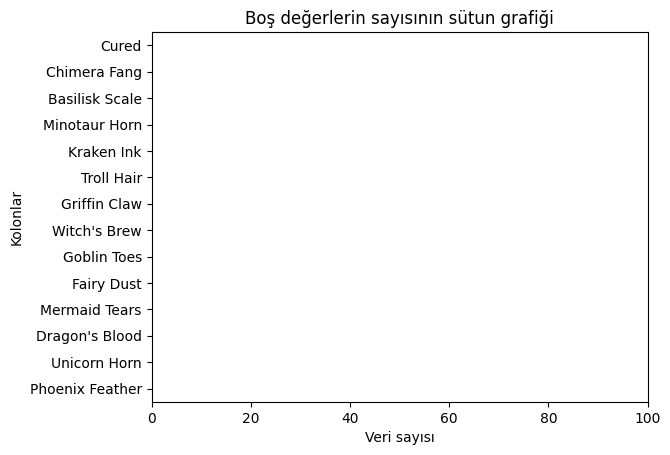

--------------------------------------------------


Özet istatistikler
                  count       mean       std  min   10%   20%    30%    40%  \
Phoenix Feather  1252.0  15.594808  8.690439  1.0  4.21  7.52  10.10  12.50   
Unicorn Horn     1252.0  10.888259  7.090822  1.0  2.50  4.30   6.10   8.00   
Dragon's Blood   1252.0  16.205351  8.600624  1.0  4.90  8.02  10.80  13.60   
Mermaid Tears    1252.0  13.593291  7.559646  1.0  4.10  6.30   8.73  10.80   
Fairy Dust       1252.0  15.157268  8.500822  1.0  3.80  7.00   9.90  12.30   
Goblin Toes      1252.0  14.147764  7.838616  1.0  3.91  6.62   9.10  11.60   
Witch's Brew     1252.0  12.313419  7.669482  1.0  3.10  5.30   7.30   9.04   
Griffin Claw     1252.0  14.816294  8.195773  1.0  4.40  7.00   9.50  11.70   
Troll Hair       1252.0  16.951358  9.743922  1.0  4.20  7.40  10.26  13.34   
Kraken Ink       1252.0  14.809984  8.017919  1.0  4.11  7.20  10.00  12.00   
Minotaur Horn    1252.0  10.938658  7.026068  1.0  2.80  4.

In [7]:
df_features(train_data)

İlk 5 gözlem

   Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  Fairy Dust  \
0             10.0          15.3            27.1           13.3        18.1   
1             31.6           1.9            25.2           17.9        16.4   
2             22.4           9.2            23.7           14.9        18.2   
3             24.5           2.3             2.2           26.2         7.3   
4              3.2          20.2            12.9           13.3         7.7   

   Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  Kraken Ink  \
0         12.3           4.8          24.0        10.0        17.5   
1          2.4           4.2           6.4        32.5        21.9   
2         10.5           6.8          15.3        21.0        16.8   
3          2.8          20.6           7.8        23.0        17.0   
4         29.6           2.6          12.9        12.7        13.8   

   Minotaur Horn  Basilisk Scale  Chimera Fang  Cured  
0            5.9            27.6  

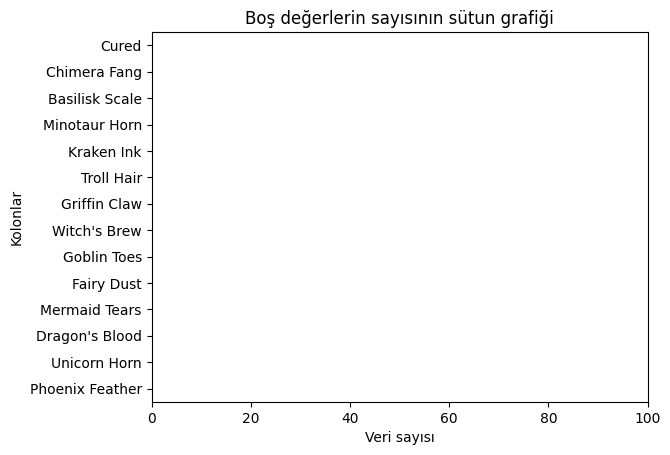

--------------------------------------------------


Özet istatistikler
                 count       mean       std  min   10%   20%    30%    40%  \
Phoenix Feather  772.0  15.527591  8.752267  1.1  3.91  6.90  10.10  12.84   
Unicorn Horn     772.0  10.832513  7.174934  1.0  2.70  4.10   6.00   7.70   
Dragon's Blood   772.0  15.990026  8.221284  1.1  5.31  7.92  11.00  13.34   
Mermaid Tears    772.0  13.597280  7.579365  1.0  3.70  6.30   8.60  10.80   
Fairy Dust       772.0  15.099611  8.251604  1.0  4.40  7.60   9.70  12.30   
Goblin Toes      772.0  14.146891  7.902114  1.0  3.70  6.70   9.53  11.70   
Witch's Brew     772.0  12.219948  7.809096  1.0  2.90  4.90   7.00   9.10   
Griffin Claw     772.0  14.953756  8.198907  1.0  4.21  6.90   9.93  12.30   
Troll Hair       772.0  17.180829  9.515024  1.0  4.40  7.90  11.33  14.24   
Kraken Ink       772.0  15.027073  8.010005  1.0  4.40  7.20  10.00  12.44   
Minotaur Horn    772.0  11.049611  7.082850  1.0  2.70  4.50   6.30   

In [8]:
df_features(test_data)

İlk 5 gözlem

   Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  Fairy Dust  \
0             13.1           7.6            11.6           11.0         4.7   
1             24.8          26.4            13.4            3.7         8.8   
2              5.8          21.2             6.8           13.2        26.2   
3              6.5          13.8            25.5            3.8        12.9   
4             22.1          17.4             4.9           20.8        10.8   

   Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  Kraken Ink  \
0         26.8           6.1           4.5        17.1         8.6   
1         37.0           1.7          14.3        30.2         5.1   
2         14.5          20.1          26.4         9.0         3.1   
3          5.0           1.9          18.7         1.4         9.4   
4          9.4           7.3          15.2        33.5        15.2   

   Minotaur Horn  Basilisk Scale  Chimera Fang  Cured  
0           10.0            13.7  

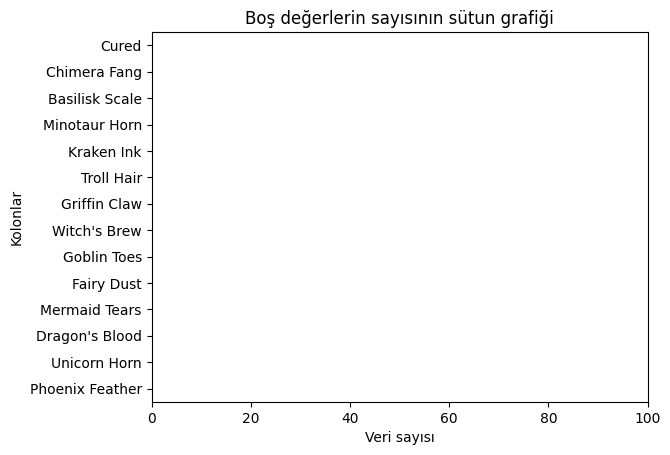

--------------------------------------------------


Özet istatistikler
                 count       mean       std  min   10%   20%    30%    40%  \
Phoenix Feather  314.0  14.054140  8.288315  1.0  3.59  6.40   9.29  11.50   
Unicorn Horn     314.0  11.460828  7.854546  1.2  2.50  3.96   5.89   7.80   
Dragon's Blood   314.0  16.066879  7.821813  1.0  5.90  9.10  11.39  13.40   
Mermaid Tears    314.0  13.841720  7.422994  1.1  4.03  7.16   9.39  11.00   
Fairy Dust       314.0  14.645541  7.983633  1.0  4.10  7.46   9.60  11.70   
Goblin Toes      314.0  14.220701  7.650779  1.2  5.03  7.00   8.90  11.72   
Witch's Brew     314.0  12.658599  7.639280  1.0  3.40  6.00   7.49   9.10   
Griffin Claw     314.0  15.185032  7.724336  1.0  4.53  7.40  11.39  13.02   
Troll Hair       314.0  15.793949  9.010725  1.0  3.90  6.58   9.20  12.40   
Kraken Ink       314.0  14.876433  8.030729  1.7  4.60  7.36  10.00  11.90   
Minotaur Horn    314.0  10.498089  7.035333  1.0  2.50  4.00   5.70   

In [9]:
df_features(valid_data)

Hedef değişkenimiz olan Cured kolonunda hangi değişken bulunuyor  ve bunların sayısı nedir ?

In [10]:
train_data["Cured"].value_counts()

0    635
1    617
Name: Cured, dtype: int64

In [11]:
test_data["Cured"].value_counts()

1    388
0    384
Name: Cured, dtype: int64

In [12]:
valid_data["Cured"].value_counts()

0    158
1    156
Name: Cured, dtype: int64

0 ve 1 değişkenlerimiz bulunmaktadır. Yani binary classification yapacağız.

Model için verilerin ayarlanması

In [13]:
np.random.seed(190401037)
train_data = train_data.values
np.random.shuffle(train_data)

test_data = test_data.values
np.random.shuffle(test_data)

valid_data = valid_data.values
np.random.shuffle(valid_data)

In [14]:
x_train = train_data[:,:-1]
y_train = train_data[:,-1]

x_test = test_data[:,:-1]
y_test = test_data[:,-1]

x_valid = valid_data[:,:-1]
y_valid = valid_data[:,-1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train.reshape(-1,1))

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))

x_valid = scaler.fit_transform(x_valid)
y_valid = scaler.fit_transform(y_valid.reshape(-1,1))

In [15]:
def df_to_torch(df, dtype = torch.float32):

  df = torch.tensor(df, dtype = dtype)
  return df

In [16]:
x_train = df_to_torch(x_train, dtype = torch.float32)
y_train = df_to_torch(y_train, dtype = torch.float32).reshape(-1,1)
x_test = df_to_torch(x_test, dtype = torch.float32)
y_test = df_to_torch(y_test,dtype = torch.float32).reshape(-1,1)
x_valid = df_to_torch(x_valid,dtype = torch.float32)
y_valid = df_to_torch(y_valid,dtype = torch.float32).reshape(-1,1)

In [17]:
y_test.shape

torch.Size([772, 1])

MLP modelinin oluşturulması

* İki hidden layer'lı bir Multilayer Perceptron (MLP) oluşturun beşinci ve altıncı haftalarda yaptığımız gibi. Hazır aktivasyon fonksiyonlarını kullanmak serbest. İlk hidden layer'da 100, ikinci hidden layer'da 50 nöron olsun. Hidden layer'larda ReLU, output layer'da sigmoid aktivasyonu olsun.

* Output layer'da kaç nöron olacağını veri setinden bakıp bulacaksınız. Elbette bu veriye uygun Cross Entropy loss yöntemini uygulayacaksınız. Optimizasyon için Stochastic Gradient Descent yeterli. Epoch sayınızı ve learning rate'i validasyon seti üzerinde denemeler yaparak (loss'lara overfit var mı diye bakarak) kendiniz belirleyeceksiniz. Batch size'ı 16 seçebilirsiniz.

* 5.1. Bölüm

In [32]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.input = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.hidden = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.input(x)
        out = self.relu1(out)
        out = self.hidden(out)
        out = self.relu2(out)
        out = self.output(out)
        out = self.sigmoid(out)
        return out

Modelin eğitilmesi için gerekli bilgilerin tanıtılması

In [19]:
x_train.shape

torch.Size([1252, 13])

In [33]:
input_size = x_train.shape[1] # 13 değer verileceği için shape[1] aldık
hidden_size1 = 100 # Açıklama gereği 100 nöron eklenecekti
hidden_size2 = 50 # açıklama gereği 50 nöron eklenecekti.
output_size = 1 # binary classification yaptığımızdan 1 nöron çıktısı elde edeceğiz.

In [34]:
model = MLP(input_size, hidden_size1, hidden_size2, output_size)

In [22]:
import torch.optim as optim
criterion = nn.BCELoss() # BinaryCrossEntropyLoss
optimizer = optim.SGD(model.parameters(), lr=0.01) 
batch_size = 32
num_epochs = 2000
patience = 2000

In [23]:
train_loss_list = []
val_loss_list = []
best_val_loss=None
patience_counter=0

Modelin eğitim süreci


* 2 farklı şekilde eğitim yapılabilir. Burada for loop kullanılarak batch sayısı kadarlık veriler alınacaktır.

* 2. yaklaşımda ise DataLoader objesi kullanılarak oluşturulabilir. Bu adım da gösterilecektir.

In [ ]:
import time
start = time.time()
seed_value = 190401037
torch.manual_seed(seed_value)

for epoch in range(num_epochs):
    epoch_train_loss = []
    for i in range(0, len(x_train), batch_size):
        inputs = x_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        epoch_train_loss.append(loss.item())

    train_loss = np.mean(epoch_train_loss)

    train_loss_list.append(train_loss)

    val_loss = 0.0

    with torch.no_grad():
        model.eval()
        for val_x, val_y in zip(x_valid,y_valid):
            outs = model(val_x)
            loss = criterion(outs, val_y)
            val_loss += loss.item()

    model.train()

  
    val_loss /= x_valid.shape[0]

    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

    val_loss_list.append(val_loss)

    val_score = val_loss
    
    if best_val_loss is None:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt")
    elif best_val_loss < val_score: 
        patience_counter += 1
        print("Earlystopping Patience Counter:",patience_counter)
        if patience_counter == patience:
            break
    else:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt") 
        patience_counter = 0
plt.plot(train_loss_list, label="Training loss")
plt.plot(val_loss_list, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


print('Finished Training')
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
predicts =[]
real_labels = list()
with torch.no_grad():
    for inputs,label in zip(x_test,y_test):
        outputs = model(inputs)
        predict = round(float(outputs.data))
        predicts.append(predict)
        real_labels.extend(label.tolist())
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score
print("Accuracy score of this model: {}".format(accuracy_score(real_labels,predicts)))
print("F1 score of this model: {}".format(f1_score(real_labels,predicts)))
print("Recall score of this model: {}".format(recall_score(real_labels,predicts)))
print("Precision score of this model: {}".format(precision_score(real_labels,predicts)))
end = time.time()
print("Total time is {}".format(end-start))

Overfit durumu için parametrelerle oynanması

Epoch 0 Training loss 0.6089243177211465 Validation Loss : 0.37535158868962126
Epoch 1 Training loss 0.4591689804426064 Validation Loss : 0.29807762916526215
Epoch 2 Training loss 0.36274292689269055 Validation Loss : 0.31695520633869945
Earlystopping Patience Counter: 1
Epoch 3 Training loss 0.3277418027883366 Validation Loss : 0.3759505895748595
Earlystopping Patience Counter: 2
Epoch 4 Training loss 0.30508808420447353 Validation Loss : 0.3064798321865123
Earlystopping Patience Counter: 3
Epoch 5 Training loss 0.2755140078829798 Validation Loss : 0.32688852916393235
Earlystopping Patience Counter: 4
Epoch 6 Training loss 0.262291331721928 Validation Loss : 0.43660994982859463
Earlystopping Patience Counter: 5
Epoch 7 Training loss 0.2435151637676081 Validation Loss : 0.3641872677953691
Earlystopping Patience Counter: 6
Epoch 8 Training loss 0.23115599832159822 Validation Loss : 0.1858192884860149
Epoch 9 Training loss 0.20633737590059828 Validation Loss : 0.4140130294937102
Earlysto

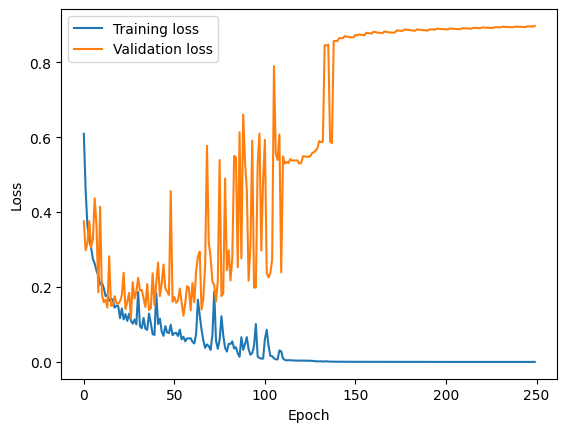

Finished Training
Accuracy score of this model: 0.9507772020725389
F1 score of this model: 0.9489247311827959
Recall score of this model: 0.9097938144329897
Precision score of this model: 0.9915730337078652
Total time is 54.902525663375854


In [37]:

import torch.optim as optim
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.BCELoss() # BinaryCrossEntropyLoss
optimizer = optim.SGD(model.parameters(), lr=0.5) 
batch_size = 4
num_epochs = 250
patience = 2000
train_loss_list = []
val_loss_list = []
best_val_loss=None
patience_counter=0
import time
start = time.time()
seed_value = 190401037
torch.manual_seed(seed_value)

for epoch in range(num_epochs):
    epoch_train_loss = []
    for i in range(0, len(x_train), batch_size):
        inputs = x_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        epoch_train_loss.append(loss.item())

    train_loss = np.mean(epoch_train_loss)

    train_loss_list.append(train_loss)

    val_loss = 0.0

    with torch.no_grad():
        model.eval()
        for val_x, val_y in zip(x_valid,y_valid):
            outs = model(val_x)
            loss = criterion(outs, val_y)
            val_loss += loss.item()

    model.train()

  
    val_loss /= x_valid.shape[0]

    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",val_loss)

    val_loss_list.append(val_loss)

    val_score = val_loss
    
    if best_val_loss is None:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt")
    elif best_val_loss < val_score: 
        patience_counter += 1
        print("Earlystopping Patience Counter:",patience_counter)
        if patience_counter == patience:
            break
    else:
        best_val_loss = val_score
        torch.save(model.state_dict(), "checkpoint.pt") 
        patience_counter = 0
plt.plot(train_loss_list, label="Training loss")
plt.plot(val_loss_list, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


print('Finished Training')
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
model.load_state_dict(torch.load('checkpoint.pt'))
model.eval()
predicts =[]
real_labels = list()
with torch.no_grad():
    for inputs,label in zip(x_test,y_test):
        outputs = model(inputs)
        predict = round(float(outputs.data))
        predicts.append(predict)
        real_labels.extend(label.tolist())
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score
print("Accuracy score of this model: {}".format(accuracy_score(real_labels,predicts)))
print("F1 score of this model: {}".format(f1_score(real_labels,predicts)))
print("Recall score of this model: {}".format(recall_score(real_labels,predicts)))
print("Precision score of this model: {}".format(precision_score(real_labels,predicts)))
end = time.time()
print("Total time is {}".format(end-start))